## Copyright Note


**This lecture main examples and figures are adapted from wiki and internet:

#### [Link 1](https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285)

#### [Link 2](https://medium.com/@apargarg99/co-occurrence-matrix-singular-value-decomposition-svd-31b3d3deb305)
 





# Revision (NN main concepts):

1. What is the activation function role? What are the problems of activation functions? (Give examples)
2. What are the gradient descent and chain rule roles?
3. What are NN/DL reguralization techniques? Describe each one in brief. 

## Learning concepts:

1. Natural Language Processing:(Deep Learning Architecture)
   - [Sentiment Analysis:](https://en.wikipedia.org/wiki/Sentiment_analysis) Needs to identify emotions and opinions:
     -   Example: This book is good; but, it has a lot of useless details.
   - [Named Entity Recognition:](https://en.wikipedia.org/wiki/Named-entity_recognition) Need to recognize the famous names like places, persons, countries, currencies, and dates:
     -  Washington park.
   - Contexts: words in contexts may give different meanings.

2. [Word Embedding:](https://medium.com/@apargarg99/co-occurrence-matrix-singular-value-decomposition-svd-31b3d3deb305) Word Embeddings are the texts converted into numbers. There may be different numerical representations of the same text-- one-hot encoding? Applications:
  - Amazon reviews.
  - Google search.
  - Social media language.
3. Types of word embedding.


# One hot repeesentation: 

One-hot representation is a representation method in which only one element is 1 and the other elements are 0 in the vector. By setting 1 or 0 for each dimension, it represents “that word or not”.

Assume you have a sentence of multiple words: (nlp, python, word, ruby, one-hot)

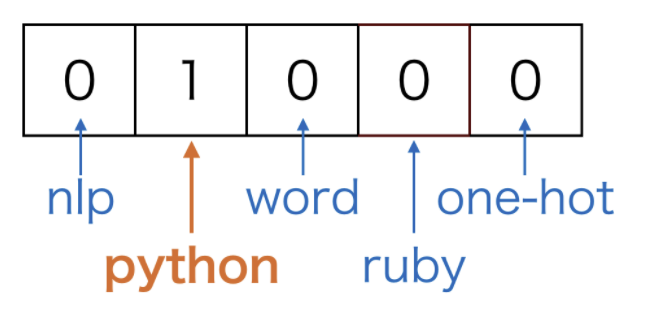

## Types of word embedding:

1. [Frequency based embedding:](https://towardsdatascience.com/simple-word-embedding-for-natural-language-processing-5484eeb05c06#:~:text=Frequency%20based%20embeddings%20vectorize%20the,words%20in%20the%20text%2F%20document.&text=This%20is%20because%20the%20frequency,document%20of%20politics%20or%20economics). Examples:
   - Count vector. 
   - HashingVectorizer.
   - TF-IDF.
   - Co-occurrence matrix.
2. Pre-trained word embeddings — Word2Vec, GloVe, BERT, fastText


**Count Vector**: Frequency based embeddings vectorize the text depending on the frequency of occurrence of the words/tokens in the text/ document.

Example:

Document 1: “The cat sat on the hat”.        
Document 2: “The dog ate the cat and the hat”.  

Bags of words are {the, cat, sat, on, hat, dog, ate, and}
D=2 and T=8.    

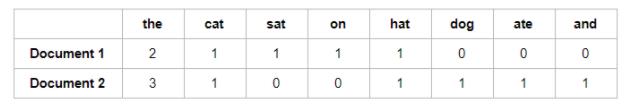

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The cat sat on the hat","The dog ate the cat and the hat"]

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

# TF-IDF vectorization: 
The idea is that in a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. 

Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency.    

- TF = (Number of times term t appears in a document)/(Number of terms in the document).    
- IDF = log(N/n), where, N is the total number of documents and n is the number of documents a term t has appeared in.   
- **TF-IDF(t, document)** = TF(t, document) * IDF(t)



In [ ]:
#Example:https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# set of documents
train = ['The sky is blue.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)
#retrieve the terms found in the corpora

# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

## Co-Occurrence Matrix with a fixed context window

**N-gram idea**: We need to calculate the probability of next word given previous words:
   1. Chain rule: p(w1...ws) = p(w1) . p(w2 | w1) . p(w3 | w1 w2) . p(w4 | w1 w2 w3) ..... p(wn | w1...wn-1)
   2. Simplified the chain rule using Markov assumption: p(wk | w1...wk-1) = p(wk | wk-1).

**Co-Occurrence Matrix**  Co-occurrence — For a given corpus: 
- The co-occurrence of a pair of words say w1 and w2 is the number of times they have appeared together in a Context Window.
- Context Window — Context window is specified by a number and the direction.

[**Example:**](https://medium.com/@apargarg99/co-occurrence-matrix-singular-value-decomposition-svd-31b3d3deb305)

Let our corpus contain the following three sentences:
1. I enjoy flying
2. I like NLP
3. I like deep learning

Co-occurence Matrix:

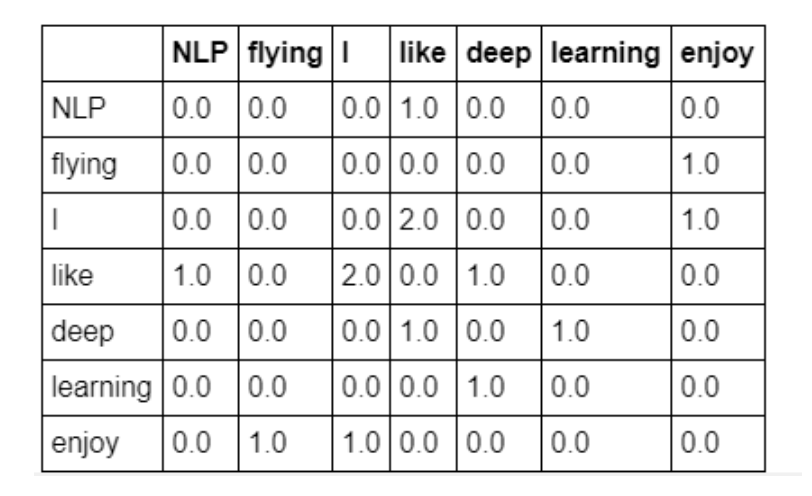
Problem — For a huge corpus, this co-occurrence matrix could become really complex (high-dimension).   

Solution — Singular value decomposition(SVD) and principal component analysis(PCA) are two eigenvalue methods used to reduce a high-dimensional dataset into fewer dimensions while retaining important information.

  - Decomposition of matrix A. decompose Co-Occurrence matrix into three matrices, U,S and V where U and V are both orthogonal matrices. What is of importance is that dot product of U and S gives the word vector representation and V gives the word context representation.

  




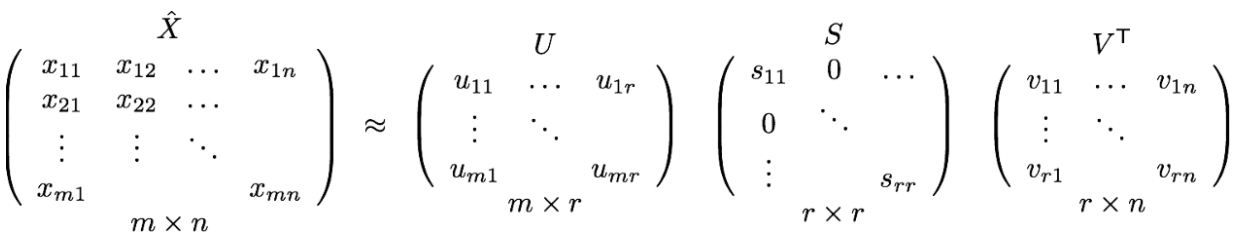

## Advantages:

1. It preserves the semantic relationship between words. i.e man and woman tend to be closer than man and apple.
2. It uses SVD at its core, which produces more accurate word vector representations than existing methods.
3. It uses factorization which is a well-defined problem and can be efficiently solved.
4. It has to be computed once and can be used anytime once computed. In this sense, it is faster in comparison to others.

## Disadvantages:

1. Memory problems with huge matrixes.
2. Debates that it doesn't really capture the deep semantics-- Example Google search engine.


In [ ]:
#Code from: https://www.pythonprogramming.in/how-to-calculate-a-word-word-co-occurrence-matrix.html

import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 
 
text_data = [['Where', 'Python', 'is', 'used'],
             ['What', 'is', 'Python' 'used', 'in'],
             ['Why', 'Python', 'is', 'best'],
             ['What', 'companies', 'use', 'Python']]
 
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
print(data_matrix)

## Prediction based methods 
### Pre-trained word embeddings — Word2Vec, GloVe, BERT, fastText

## [Word2Vec:](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa)
Word2Vec is a method to construct such an embedding. It can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW).

The example and ilustration with algorithms are from [link](https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285)

 “The cat jumped over the puddle.”

Usually the **Cross Entropy**

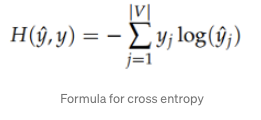


## Continuous Bag of Words(CBOW): 

**CBOW** is learning to predict the word by the context. A context may be single word or multiple word for a given target words.

In the above example, treat {“The”, “cat”, ’over”, “the’, “puddle”} as a context and from these words, be able to predict or generate the center word “jumped”. 

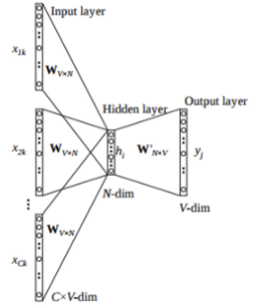



## Skip-gram model:

A model such that given the center word “jumped”, the model will be able to predict or generate the surrounding words “The”, “cat”, “over”, “the”, “puddle”. Here we call the word “jumped” the context. We call this type of model a SkipGram model.
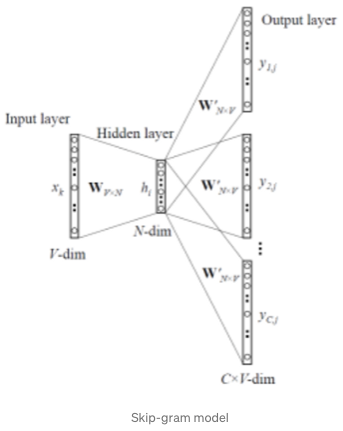
